### Setup Notebook

In [1]:
#@title Enable prune mode
#@markdown ---
PRUNE_MODEL = False                   #@param {type:"boolean"}
PRUNE_A_FILE = False                   #@param {type:"boolean"}
PRUNE_CSV_FILES = False                #@param {type:"boolean"}

SHOW_PLOTS = False                #@param {type:"boolean"}

In [2]:
#@title Github related infos
#@markdown ---
PROJECT_NAME_PATH = '/content/My-Siren-Deep-Learning-Test' #@param {type:"string"}

    
GITHUB_PROJECT_URL = 'https://github.com/franec94/My-Siren-Deep-Learning-Test.git' #@param {type:"string"}
BRANCH_NAME = 'cmd-line-tools' #@param {type:"string"}
CMD_TOOL_NAME = 'post-train-cmd-line-tools/prune-eval-tool' #@param {type:"string"}

In [3]:
#@title Model's Hyper-Params
#@markdown ---
N_HF=35 #@param {type:"integer"}
N_HL=9  #@param {type:"integer"}
SIDELENGTH=256 #@param {type:"integer"}
DEVICE = "cpu" #@param ["cpu", "cuda", "gpu"]
BATCH_SIZE=1 #@param {type:"integer"}
MODEL_PATH='/content/model_final.pth' #@param {type:"string"}

In [4]:
FROM_UPLOADED_FILE = False #@param {type:"boolean"}
UPLOADED_FILE_NAME = "/content/final_result_pruning.csv" #@param {type:"string"}

In [5]:
#@markdown ---
#@markdown ##### Data csv Info:
TIMESTAMP_VAL = "1605077314-991078" #@param {type:"string"}
EVAL_CSV_FILES = False  #@param {type:"boolean"}
EVAL_ALL_CSV_FILES = False  #@param {type:"boolean"}

In [6]:
DATA_ZIP_PATH = f"/content/{TIMESTAMP_VAL}.zip"
DATA_PATH = f"/content/{TIMESTAMP_VAL}" 
DATA_CSV_PATH = f"/content/{TIMESTAMP_VAL}/colab_{TIMESTAMP_VAL}.csv"

DATA_ZIP_PATH, DATA_PATH, DATA_CSV_PATH

('/content/1605077314-991078.zip',
 '/content/1605077314-991078',
 '/content/1605077314-991078/colab_1605077314-991078.csv')

In [7]:
if PRUNE_MODEL and EVAL_CSV_FILES:
    import os
    print("Extracting data...")
    if os.path.exists(DATA_ZIP_PATH):
        print(f"{DATA_ZIP_PATH} exists!")
        if os.path.isdir(f"{DATA_PATH}"):
            !unzip {DATA_ZIP_PATH} -o -d /content/ > /dev/null
        else:
            !unzip {DATA_ZIP_PATH} -d /content/ > /dev/null
    else:
        print(f"{DATA_ZIP_PATH} does not exist!")
    pass

In [8]:
if PRUNE_MODEL and EVAL_ALL_CSV_FILES:
    DATA_CSV_PATH = []
    import pathlib
    zip_files_list = pathlib.Path(f'/content').glob(f'*.zip')
    for a_zip_file in zip_files_list:
        print("Extracting data...")
        filename = os.path.basename(a_zip_file)
        filename = os.path.splitext(filename)[0]
        DATA_CSV_PATH.append(f"/content/{filename}/colab_{filename}.csv")
        if os.path.exists(a_zip_file):
            print(f"{a_zip_file} exists!")
            !unzip {a_zip_file} -d /content/ > /dev/null
        else:
            print(f"{a_zip_file} does not exist!")
        pass
    DATA_CSV_PATH = ' '.join(DATA_CSV_PATH)
    print(DATA_CSV_PATH)
    pass

In [9]:
#@title Save results
#@markdown ---
LOGGING_ROOT = '/content/results/cameramen' #@param {type:"string"}
EXPERIMENT_NAME = 'train' #@param {type:"string"}


In [10]:
#@title Handle workspace
#@markdown ---
CLEAR_RESULTS_DIR = False      #@param {type:"boolean"}
RESULTS_DIR_PATH = "/content/results"      #@param {type:"string"}

In [11]:
if CLEAR_RESULTS_DIR:
    import os
    if os.path.exists(RESULTS_DIR_PATH) and os.path.isdir(RESULTS_DIR_PATH):
        print(f"Clearing {RESULTS_DIR_PATH}...")
        !rm -R {RESULTS_DIR_PATH}/*
        !rmdir {RESULTS_DIR_PATH}
        pass
    pass

### Imports

In [12]:
# Installing third party dependencies
print("Installing required libraries...")

old_requirements = '/content/tmp_requirements.txt'
!pip freeze > {old_requirements}
dependencies_list = "cmapy,sk-video,pytorch-model-summary,ConfigArgParse,tabulate,chart_studio,dash,dash_bootstrap_components".split(",")

with open(old_requirements) as f:
    old_requirements_list = f.read().split("\n")
    for a_req in dependencies_list:
        found_req = False
        for old_req in old_requirements_list:
            if old_req.startswith(a_req):
                print(f"{a_req} already installed!")
                found_req = True
                break
        if found_req is False:
            !pip install {a_req} -q
    pass
!rm -f {old_requirements}

Installing required libraries...
cmapy already installed!
sk-video already installed!
pytorch-model-summary already installed!
ConfigArgParse already installed!
tabulate already installed!
dash already installed!


In [13]:
from __future__ import print_function
from __future__ import division

# --------------------------------------------- #
# Standard Library, plus some Third Party Libraries
# --------------------------------------------- #

DASH_TEMPLATES_LIST = ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]

from PIL import Image
from functools import partial
from pprint import pprint
from tqdm import tqdm
from typing import Tuple, Union


import configargparse
import copy
import collections
import datetime
import itertools
import functools
import h5py
import logging
import math
import os
import operator
import pickle
import random
import shutil
import sys
import re
import tabulate 
import time
# import visdom


from collections import OrderedDict
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# --------------------------------------------- #
# Data Science and Machine Learning Libraries
# --------------------------------------------- #
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

import numpy as np
import pandas as pd
import sklearn

from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split

# --------------------------------------------- #
# Torch
# --------------------------------------------- #
try:
    import torch
    import torch.nn as nn
    import torch.nn.functional as F
    import torch.optim as optim
    from torch.utils.data import DataLoader, Dataset
    import torch.quantization
    import torch.nn.utils.prune as prune
except:
    print("torch not available!")
    pass


# --------------------------------------------- #
# Import: TorchVision
# --------------------------------------------- #
try:
    import torchvision
    from torchvision import datasets
    from torchvision import transforms
    from torchvision.transforms import Resize, Compose, ToTensor, CenterCrop, Normalize
    from torchvision.utils import save_image
except:
    print("torchvision library not available!")
    pass

# Plotly imports.
# ----------------------------------------------- #
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.express as px

# --------------------------------------------- #
# Import: skimage
# --------------------------------------------- #
try:
    import skimage
    import skimage.metrics as skmetrics
    from skimage.metrics import peak_signal_noise_ratio as psnr
    from skimage.metrics import structural_similarity as ssim
    from skimage.metrics import mean_squared_error
except:
    print("skimage library not available!")
    pass

### Fetch Github project

In [14]:
import os
os.chdir('/content')

In [15]:
# Setup wd to remove trash

if PRUNE_MODEL:
    # Remove trash
    import os
    if os.path.exists(f'{PROJECT_NAME_PATH}') and os.path.isdir(f'{PROJECT_NAME_PATH}'):
        print("Cleaning from old project...")
        !rm -r {PROJECT_NAME_PATH}
    else:
        print("No project found.")
        pass

    import os
    logs_base_dir = os.path.join("/content/outputs", "summaries")
    os.makedirs(logs_base_dir, exist_ok=True)

    if os.path.exists(PROJECT_NAME_PATH) is False:
        !git clone {GITHUB_PROJECT_URL}
        os.chdir(PROJECT_NAME_PATH)
        !git checkout {BRANCH_NAME}
        full_path_cmd = os.path.join(PROJECT_NAME_PATH, f'dev-cmd-line-tools/{CMD_TOOL_NAME}')
        os.chdir(full_path_cmd)
    else:
        os.chdir(PROJECT_NAME_PATH)
        !git checkout {BRANCH_NAME}
        !git fetch
        full_path_cmd = os.path.join(PROJECT_NAME_PATH, f'dev-cmd-line-tools/{CMD_TOOL_NAME}')
        os.chdir(full_path_cmd)
        pass
    pass
else:
    print("No github project cloned and no branch activated and switched to!")
    pass

No github project cloned and no branch activated and switched to!


### Run program

In [16]:
# Show help
if PRUNE_MODEL:
    !python main.py --help

In [17]:
if PRUNE_MODEL and PRUNE_A_FILE:
    !python main.py \
        --logging_root {LOGGING_ROOT} \
        --experiment_name {EXPERIMENT_NAME} \
        --models_filepath {MODEL_PATH} \
        --sidelength {SIDELENGTH} \
        --n_hf {N_HF} \
        --n_hl {N_HL} \
        --global_pruning_techs 'L1Unstructured' 'RandomUnstructured' \
        --global_pruning_rates .01 .02 .03 .04 .05 .06 .07 .08 .1 .2 .3 .4 .5 .6 .7 .8 .9 \
        --global_pruning_abs 10 20 30 40 50 60 70 80 90 100 150 200 500 1000 1500 1700 2000 2500 2700 3000\
        --dynamic_quant qint8 qfloat16 \
        --verbose 0
    pass
else:
    print("No single architecture's state dict file pruned!")
    pass

No single architecture's state dict file pruned!


In [18]:
if PRUNE_MODEL and PRUNE_CSV_FILES:
    """
    !python main.py \ 
        --logging_root {LOGGING_ROOT} \
        --experiment_name {EXPERIMENT_NAME} \
        --csv_files {DATA_CSV_PATH} \
        --sidelength {SIDELENGTH} \
        --global_pruning_techs 'L1Unstructured' 'RandomUnstructured' \
        --global_pruning_rates .01 .02 .03 .04 .05 .06 .07 .08 .1 .2 .3 .4 .5 .6 .7 .8 .9 \
        --global_pruning_abs 10 20 30 40 50 60 70 80 90 100 150 200 500 1000 1500 1700 2000 2500 2700 3000 4000 5000 \      
        --dynamic_quant qint8 qfloat16 \
        --verbose 0
    """
    pass
else:
    print("No many architectures state dict file pruned!")
    pass
# --global_abs_linspace 50 \

No many architectures state dict file pruned!


## Checkout results

### Prepare DataFrame

In [19]:
import pandas as pd

In [20]:
TS = '1605613684-599667'
DATE = '17-11-2020'
res = f'/content/results/cameramen/{DATE}/{TS}/trainresults.csv'
res_2 = f'/content/results/cameramen/{DATE}/{TS}/trainresults_2.csv'
if SHOW_PLOTS == True and FROM_UPLOADED_FILE == False:
    try:
        df = pd.read_csv(f'{res}').drop(['Unnamed: 0'], axis = 1)
        print(f"Fetched {res}")
    except:
        df = pd.read_csv(f'{res_2}').drop(['Unnamed: 0'], axis = 1)
        print(f"Fetched {res_2}")
        pass
else:
    df = pd.read_csv(f'{UPLOADED_FILE_NAME}').drop(['Unnamed: 0'], axis = 1)
    pass

Fetched /content/results/cameramen/17-11-2020/1605613684-599667/trainresults_2.csv


In [21]:
df.head(5)

model_name  ...  prune_amount
0  1605077314-991078.32.5.arch_no_0.trial_no_0  ...           NaN
1  1605077314-991078.32.5.arch_no_0.trial_no_0  ...          0.01
2  1605077314-991078.32.5.arch_no_0.trial_no_0  ...          0.01
3  1605077314-991078.32.5.arch_no_0.trial_no_0  ...          0.01
4  1605077314-991078.32.5.arch_no_0.trial_no_0  ...          0.01

[5 rows x 11 columns]

In [22]:
df.tail(5)

model_name  ...  prune_amount
6243  1605077314-991078.32.12.arch_no_7.trial_no_0  ...        5000.0
6244  1605077314-991078.32.12.arch_no_7.trial_no_0  ...        5000.0
6245  1605077314-991078.32.12.arch_no_7.trial_no_0  ...        5000.0
6246  1605077314-991078.32.12.arch_no_7.trial_no_0  ...        5000.0
6247  1605077314-991078.32.12.arch_no_7.trial_no_0  ...        5000.0

[5 rows x 11 columns]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6248 entries, 0 to 6247
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   model_name         6248 non-null   object 
 1   mse                6248 non-null   float64
 2   psnr_db            6248 non-null   float64
 3   ssim               6248 non-null   float64
 4   eta_seconds        6248 non-null   float64
 5   footprint_byte     6248 non-null   int64  
 6   footprint_percent  6248 non-null   float64
 7   bpp                6248 non-null   float64
 8   quant_tech         6248 non-null   object 
 9   quant_tech_2       6248 non-null   object 
 10  prune_amount       6240 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 537.1+ KB


In [24]:
df.describe()

mse      psnr_db  ...          bpp  prune_amount
count  6248.000000  6248.000000  ...  6248.000000   6240.000000
mean      0.178397    20.022542  ...     4.992416    636.022051
std       0.171615    11.297812  ...     1.304349   1222.270922
min       0.000279     5.957097  ...     1.611755      0.010000
25%       0.004645    10.890583  ...     3.575134      0.200000
50%       0.130239    14.877566  ...     4.705505     30.000000
75%       0.325885    29.350887  ...     5.847595    500.000000
max       1.014938    41.562062  ...     6.985779   5000.000000

[8 rows x 8 columns]

In [25]:
set(df["quant_tech"])

{'Basic', 'L1Unstructured', 'RandomUnstructured'}

In [26]:
set(df["model_name"])

{'1605077314-991078.32.10.arch_no_5.trial_no_0',
 '1605077314-991078.32.11.arch_no_6.trial_no_0',
 '1605077314-991078.32.12.arch_no_7.trial_no_0',
 '1605077314-991078.32.5.arch_no_0.trial_no_0',
 '1605077314-991078.32.6.arch_no_1.trial_no_0',
 '1605077314-991078.32.7.arch_no_2.trial_no_0',
 '1605077314-991078.32.8.arch_no_3.trial_no_0',
 '1605077314-991078.32.9.arch_no_4.trial_no_0'}

In [27]:
if FROM_UPLOADED_FILE == False:
    columns = df.columns
    RecordDataFrame = collections.namedtuple('RecordDataFrame', columns)
    def get_size_by_weigths_bits(a_row):
        a_record = RecordDataFrame._make(a_row)
        model_name = a_record.model_name
        hf = int(model_name.split(".")[1])
        hl = int(model_name.split(".")[2])
        weigths_no = (hf * 2 + 1) + (hf*hf*hl + hf*hl) + (hf+1)
        if a_record.quant_tech_2 == 'Basic':
            return weigths_no * 4 * 8
        if a_record.quant_tech_2.endswith('_abs'):
            return (weigths_no - int(a_record.prune_amount)) * 4 * 8
        if a_record.quant_tech_2.endswith('_rate'):
            return int(weigths_no - weigths_no * a_record.prune_amount) * 4 * 8
        return np.nan
    df['size_by_weigths_bit'] = list(map(get_size_by_weigths_bits, df.values))
    pass

In [28]:
def get_n_hf(a_row):
    return int(a_row[0].split(".")[1])
def get_n_hl(a_row):
    return int(a_row[0].split(".")[2])

df["n_hf"] = list(map(get_n_hf, df.values))
df["n_hl"] = list(map(get_n_hl, df.values))

In [29]:
df.head(5)

model_name       mse  ...  n_hf  n_hl
0  1605077314-991078.32.5.arch_no_0.trial_no_0  0.000800  ...    32     5
1  1605077314-991078.32.5.arch_no_0.trial_no_0  0.086294  ...    32     5
2  1605077314-991078.32.5.arch_no_0.trial_no_0  0.157211  ...    32     5
3  1605077314-991078.32.5.arch_no_0.trial_no_0  0.087492  ...    32     5
4  1605077314-991078.32.5.arch_no_0.trial_no_0  0.080925  ...    32     5

[5 rows x 14 columns]

In [30]:
df.tail(5)

model_name      mse  ...  n_hf  n_hl
6243  1605077314-991078.32.12.arch_no_7.trial_no_0  0.24776  ...    32    12
6244  1605077314-991078.32.12.arch_no_7.trial_no_0  0.24776  ...    32    12
6245  1605077314-991078.32.12.arch_no_7.trial_no_0  0.24776  ...    32    12
6246  1605077314-991078.32.12.arch_no_7.trial_no_0  0.24776  ...    32    12
6247  1605077314-991078.32.12.arch_no_7.trial_no_0  0.24776  ...    32    12

[5 rows x 14 columns]

In [31]:
if FROM_UPLOADED_FILE == False:
    tmp_df = df.set_index(['model_name'])
    for a_index in set(tmp_df.index):
        # print(tmp_df.loc[a_index,:]['size_by_weigths_bit'].values.max())
        tmp_res = tmp_df.loc[a_index,:]['size_by_weigths_bit'].values / (tmp_df.loc[a_index,:]['size_by_weigths_bit'].values.max())
        tmp_df.loc[a_index, ["tmp_footprint_p"]]= tmp_res
        pass
    pass

In [32]:
if FROM_UPLOADED_FILE == False:
    tmp_df.head(5)

In [33]:
if FROM_UPLOADED_FILE == False:
    tmp_df.tail(5)

In [34]:
if FROM_UPLOADED_FILE == False:
    df = tmp_df.reset_index()

In [35]:
if FROM_UPLOADED_FILE == False:
    df['bpp'] = df['size_by_weigths_bit'].values / (256*256)

### Plots

In [36]:
hover_labels = ["bpp", "psnr_db", "quant_tech_2", "prune_amount", "n_hf", "n_hl"]
hue = 'quant_tech'; x = 'bpp'; y = 'psnr_db'
fig = px.scatter(df[df[f"{hue}"] != 'Basic'], x=f"{x}", y=f"{y}", color=f"{hue}", 
                 # marginal_y="violin", marginal_x="box", trendline="ols",
                 hover_data = hover_labels,
                 template=DASH_TEMPLATES_LIST[2])
fig.update_layout(template = DASH_TEMPLATES_LIST[2], title_text=f'{y.upper()} | Groupped by {hue} | dataframes')

In [37]:
hue = 'quant_tech_2'; x = 'bpp'; y = 'psnr_db'
fig = px.scatter(df[df[f"{hue}"] != 'Basic'], x=f"{x}", y=f"{y}", color=f"{hue}", 
                 # marginal_y="violin", marginal_x="box", trendline="ols",
                 hover_data = hover_labels,
                 template=DASH_TEMPLATES_LIST[2])
fig.update_layout(template = DASH_TEMPLATES_LIST[2], title_text=f'{y.upper()} | Groupped by {hue} | dataframes')

In [38]:
hue = 'quant_tech'; x = 'bpp'; y = 'psnr_db'
fig = px.box(df[df[f"{hue}"] != 'Basic'], y=f"{y}", color=f"{hue}", 
                 # marginal_y="violin", marginal_x="box", trendline="ols",
                 template=DASH_TEMPLATES_LIST[2])
fig.update_layout(template = DASH_TEMPLATES_LIST[2], title_text=f'{y.upper()} | Groupped by {hue} | dataframes')

In [39]:
hue = 'quant_tech_2'; x = 'bpp'; y = 'psnr_db'
fig = px.box(df[df[f"{hue}"] != 'Basic'], y=f"{y}", color=f"{hue}", 
                 # marginal_y="violin", marginal_x="box", trendline="ols",
                 template=DASH_TEMPLATES_LIST[2])
fig.update_layout(template = DASH_TEMPLATES_LIST[2], title_text=f'{y.upper()} | Groupped by {hue} | dataframes')

In [40]:
hue = 'quant_tech'; x = 'bpp'; y = 'psnr_db'
fig = px.violin(df[df[f"{hue}"] != 'Basic' ], y=f"{y}", color=f"{hue}", 
                 # marginal_y="violin", marginal_x="box", trendline="ols",
                 template=DASH_TEMPLATES_LIST[2])
fig.update_layout(template = DASH_TEMPLATES_LIST[2], title_text=f'{y.upper()} | Groupped by {hue} | dataframes')

In [41]:
hue = 'quant_tech_2'; x = 'bpp'; y = 'psnr_db'
fig = px.violin(df[df[f"{hue}"] != 'Basic' ], y=f"{y}", color=f"{hue}", 
                 # marginal_y="violin", marginal_x="box", trendline="ols",
                 template=DASH_TEMPLATES_LIST[2])
fig.update_layout(template = DASH_TEMPLATES_LIST[2], title_text=f'{y.upper()} | Groupped by {hue} | dataframes')

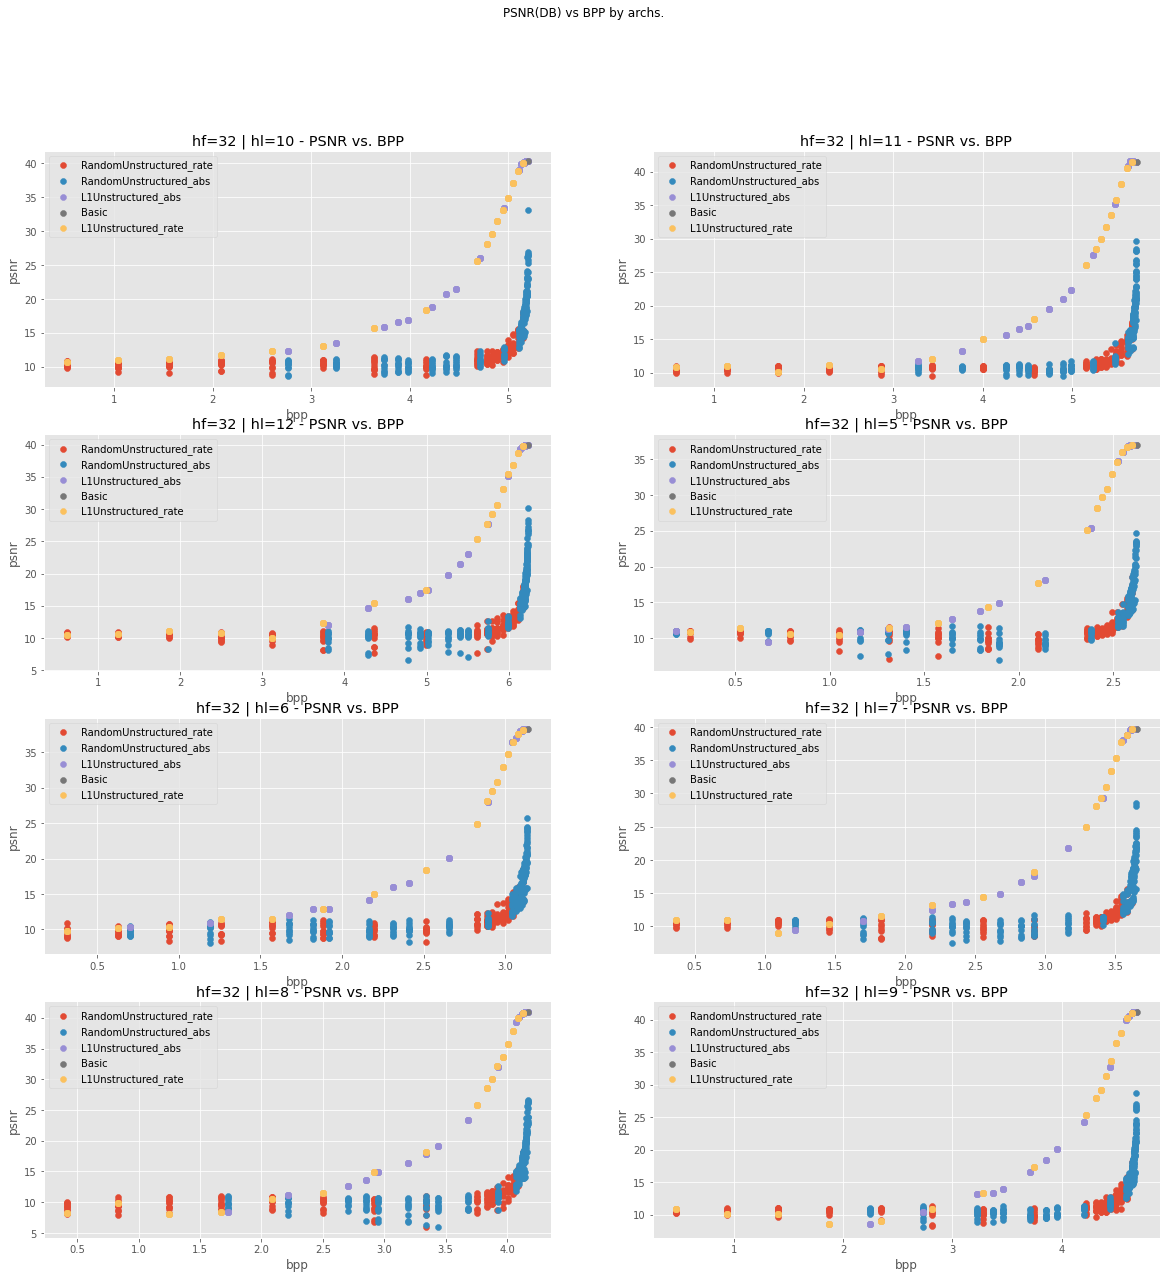

In [42]:
hue = 'quant_tech_2';
tmp_df = df.set_index(['model_name'])
n = len(set(tmp_df.index))
n = n // 2 if n % 2 == 0 else n // 2 + 1

fig, axes = plt.subplots(n, 2, figsize = (20, 20))
axes_list = list(itertools.chain(*axes))
fig.suptitle("PSNR(DB) vs BPP by archs.")

for pos, a_index in enumerate(sorted(set(tmp_df.index))):
    a_group = tmp_df.loc[a_index,:]
    labels = set(a_group[f'{hue}'])
    
    ax = axes_list[pos]
    for a_label in labels:
        bpp_psnr_p = a_group[a_group[f'{hue}'] == a_label][["bpp", "psnr_db"]]
        ax.scatter(bpp_psnr_p['bpp'].values, bpp_psnr_p['psnr_db'].values, label=a_label)
        hf = str(a_index).split(".")[1]; hl = str(a_index).split(".")[2]
        pass
        ax.set_xlabel('bpp'); ax.set_ylabel('psnr'); 
        ax.set_title(f'hf={hf} | hl={hl} - PSNR vs. BPP');
        ax.legend()
    pass
plt.show()

In [43]:
# fig = px.scatter(df, x="bpp", y="psnr_db", facet_col="model_name")
fig = px.scatter(df, x="bpp", y="psnr_db", facet_col="quant_tech", color=f"quant_tech_2", template=DASH_TEMPLATES_LIST[2])
fig.update_layout(template = DASH_TEMPLATES_LIST[2], title_text=f'Prune RandomUnstructured ({y.upper()} vs {x.upper()})')
fig.show()

In [44]:
df_tmp = df[(df["quant_tech"] == "RandomUnstructured") | (df["quant_tech"] == "Basic")]
hover_labels = ["bpp", "psnr_db", "quant_tech_2", "prune_amount", "n_hf", "n_hl"]
x = "bpp"; y = "psnr_db";
fig = px.scatter(
    df_tmp, x="bpp", y="psnr_db", color="quant_tech_2",
    template=DASH_TEMPLATES_LIST[2],
    hover_data=df_tmp[hover_labels])
fig.update_layout(template = DASH_TEMPLATES_LIST[2], title_text=f'Prune RandomUnstructured ({y.upper()} vs {x.upper()})')
fig.show()

In [45]:
df_tmp = df[(df["quant_tech"] == "L1Unstructured") | (df["quant_tech"] == "Basic")]
hover_labels = ["bpp", "psnr_db", "quant_tech_2", "prune_amount", "n_hf", "n_hl"]
x = "bpp"; y = "psnr_db";
fig = px.scatter(
    df_tmp, x="bpp", y="psnr_db", color="quant_tech_2", 
    hover_data=df_tmp[hover_labels],
    template=DASH_TEMPLATES_LIST[2],)
fig.update_layout(template = DASH_TEMPLATES_LIST[2], title_text=f'Prune L1Unstructured ({y.upper()} vs {x.upper()})')
fig.show()

In [46]:
n_hl_min = df["n_hl"].values.min()
n_hl_max = df["n_hl"].values.max()
tmp_list = list(set(df["n_hl"].values))
n_hl_medium = tmp_list[len(tmp_list)//2]

condition_selection = \
    ((df["quant_tech"] == "RandomUnstructured") | (df["quant_tech"] == "Basic")) \
    & ((df["n_hl"] == n_hl_min) | (df["n_hl"] == n_hl_medium) | (df["n_hl"] == n_hl_max))
df_tmp = df[condition_selection]
hover_labels = ["bpp", "psnr_db", "quant_tech_2", "prune_amount", "n_hf", "n_hl"]
x = "bpp"; y = "psnr_db";
fig = px.scatter(
    df_tmp, x="bpp", y="psnr_db", color="quant_tech_2", 
    hover_data=df_tmp[hover_labels],
    template=DASH_TEMPLATES_LIST[2],)
fig.update_layout(template = DASH_TEMPLATES_LIST[2], title_text=f'Prune RandomUnstructured ({y.upper()} vs {x.upper()})')
fig.show()

In [47]:
n_hl_min = df["n_hl"].values.min()
n_hl_max = df["n_hl"].values.max()
tmp_list = list(set(df["n_hl"].values))
n_hl_medium = tmp_list[len(tmp_list)//2]

condition_selection = \
    ((df["quant_tech"] == "L1Unstructured") | (df["quant_tech"] == "Basic")) \
    & ((df["n_hl"] == n_hl_min) | (df["n_hl"] == n_hl_medium) | (df["n_hl"] == n_hl_max))
df_tmp = df[condition_selection]
hover_labels = ["bpp", "psnr_db", "quant_tech_2", "prune_amount", "n_hf", "n_hl"]
x = "bpp"; y = "psnr_db";
fig = px.scatter(
    df_tmp, x="bpp", y="psnr_db", color="quant_tech_2", 
    hover_data=df_tmp[hover_labels],
    template=DASH_TEMPLATES_LIST[2],)
fig.update_layout(template = DASH_TEMPLATES_LIST[2], title_text=f'Prune L1Unstructured ({y.upper()} vs {x.upper()})')
fig.show()

In [48]:
n_hl_min = df["n_hl"].values.min()
n_hl_max = df["n_hl"].values.max()
tmp_list = list(set(df["n_hl"].values))
n_hl_medium = tmp_list[len(tmp_list)//2]

condition_selection = \
    ((df["quant_tech"] == "RandomUnstructured") | (df["quant_tech"] == "Basic")) \
    & ((df["n_hl"] == n_hl_min) | (df["n_hl"] == n_hl_medium) | (df["n_hl"] == n_hl_max))
df_tmp = df[condition_selection]
hover_labels = ["bpp", "psnr_db", "quant_tech_2", "prune_amount", "n_hf", "n_hl"]
x = "bpp"; y = "psnr_db";
hist_data = []
group_labels = set(df_tmp["quant_tech_2"].values)
for a_label in group_labels:
    print(a_label)
    hist_data.append(df_tmp[df_tmp["quant_tech_2"] == str(a_label)][y].values)
    pass
fig = ff.create_distplot(
    hist_data = hist_data, group_labels = list(group_labels))
fig.update_layout(template = DASH_TEMPLATES_LIST[2], title_text=f'Prune RandomUnstructured ({y.upper()})')
fig.show()

Basic
RandomUnstructured_rate
RandomUnstructured_abs


In [49]:
n_hl_min = df["n_hl"].values.min()
n_hl_max = df["n_hl"].values.max()
tmp_list = list(set(df["n_hl"].values))
n_hl_medium = tmp_list[len(tmp_list)//2]

condition_selection = \
    ((df["quant_tech"] == "L1Unstructured") | (df["quant_tech"] == "Basic")) \
    & ((df["n_hl"] == n_hl_min) | (df["n_hl"] == n_hl_medium) | (df["n_hl"] == n_hl_max))
df_tmp = df[condition_selection]
hover_labels = ["bpp", "psnr_db", "quant_tech_2", "prune_amount", "n_hf", "n_hl"]
x = "bpp"; y = "psnr_db";
hist_data = []
group_labels = set(df_tmp["quant_tech_2"].values)
for a_label in group_labels:
    print(a_label)
    hist_data.append(df_tmp[df_tmp["quant_tech_2"] == str(a_label)][y].values)
    pass
fig = ff.create_distplot(
    hist_data = hist_data, group_labels = list(group_labels))
fig.update_layout(template = DASH_TEMPLATES_LIST[2], title_text=f'Prune L1Unstructured ({y.upper()})')
fig.show()

Basic
L1Unstructured_rate
L1Unstructured_abs


In [50]:
n_hl_min = df["n_hl"].values.min()
n_hl_max = df["n_hl"].values.max()
tmp_list = list(set(df["n_hl"].values))
n_hl_medium = tmp_list[len(tmp_list)//2]

condition_selection = \
    ((df["quant_tech"] == "RandomUnstructured") | (df["quant_tech"] == "Basic")) \
    & ((df["n_hl"] == n_hl_min) | (df["n_hl"] == n_hl_medium) | (df["n_hl"] == n_hl_max))
df_tmp = df[condition_selection]

In [51]:
columns = list(df_tmp.columns)
def divide_by_hl_size(a_row, columns = columns):
    n_hl = columns.index("n_hl")
    quant_tech_2 = columns.index("quant_tech_2")
    if a_row[quant_tech_2] == 'Basic': return a_row[quant_tech_2]
    return a_row[quant_tech_2] + "-" + str(a_row[n_hl])

df_tmp["label_by_tech_hl"] = list(map(divide_by_hl_size, df_tmp.values))

In [52]:
x = "bpp"; y = "psnr_db";
hist_data = []
group_labels = set(df_tmp["label_by_tech_hl"].values)
for a_label in group_labels:
    print(a_label)
    hist_data.append(df_tmp[df_tmp["label_by_tech_hl"] == str(a_label)][y].values)
    pass
fig = ff.create_distplot(
    hist_data = hist_data,
    group_labels = list(group_labels))
fig.update_layout(template = DASH_TEMPLATES_LIST[2], title_text=f'Prune RandomUnstructured ({y.upper()})')
fig.show()

RandomUnstructured_rate-12
RandomUnstructured_abs-12
RandomUnstructured_rate-5
RandomUnstructured_abs-5
RandomUnstructured_abs-9
Basic
RandomUnstructured_rate-9


In [53]:
n_hl_min = df["n_hl"].values.min()
n_hl_max = df["n_hl"].values.max()
tmp_list = list(set(df["n_hl"].values))
n_hl_medium = tmp_list[len(tmp_list)//2]

condition_selection = \
    ((df["quant_tech"] == "L1Unstructured") | (df["quant_tech"] == "Basic")) \
    & ((df["n_hl"] == n_hl_min) | (df["n_hl"] == n_hl_medium) | (df["n_hl"] == n_hl_max))
df_tmp = df[condition_selection]

In [54]:
columns = list(df_tmp.columns)
def divide_by_hl_size(a_row, columns = columns):
    n_hl = columns.index("n_hl")
    quant_tech_2 = columns.index("quant_tech_2")
    if a_row[quant_tech_2] == 'Basic': return a_row[quant_tech_2]
    return a_row[quant_tech_2] + "-" + str(a_row[n_hl])

df_tmp["label_by_tech_hl"] = list(map(divide_by_hl_size, df_tmp.values))

In [60]:
x = "bpp"; y = "psnr_db";
hist_data = []
group_labels = set(df_tmp["label_by_tech_hl"].values)
for a_label in group_labels:
    print(a_label)
    hist_data.append(df_tmp[df_tmp["label_by_tech_hl"] == str(a_label)][y].values)
    pass
fig = ff.create_distplot(
    hist_data = hist_data,
    group_labels = list(group_labels))
fig.update_layout(template = DASH_TEMPLATES_LIST[2], title_text=f'Prune L1Unstructured ({y.upper()})')
fig.show()

L1Unstructured_abs-12
L1Unstructured_rate-12
Basic
L1Unstructured_rate-5
L1Unstructured_rate-9
L1Unstructured_abs-9
L1Unstructured_abs-5


In [56]:
stop_val = (24*2 + 2) + (24*24*5 + 24*5) + (24 + 1)
# np.logspace(1, stop_val, num=10, endpoint=False)
np.unique(np.linspace(1, stop_val, num=50, endpoint=False).astype(dtype = np.int))

array([   1,   62,  123,  185,  246,  308,  369,  431,  492,  554,  615,
        677,  738,  800,  861,  923,  984, 1046, 1107, 1169, 1230, 1292,
       1353, 1415, 1476, 1538, 1599, 1660, 1722, 1783, 1845, 1906, 1968,
       2029, 2091, 2152, 2214, 2275, 2337, 2398, 2460, 2521, 2583, 2644,
       2706, 2767, 2829, 2890, 2952, 3013])

In [57]:
np.unique(np.logspace(1, int(np.log10(stop_val)), num=100, endpoint=False).astype(dtype = np.int))

array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  25,  26,  27,  28,  30,  31,  33,  34,  36,  38,  39,  41,
        43,  45,  47,  50,  52,  54,  57,  60,  63,  66,  69,  72,  75,
        79,  83,  87,  91,  95, 100, 104, 109, 114, 120, 125, 131, 138,
       144, 151, 158, 165, 173, 181, 190, 199, 208, 218, 229, 239, 251,
       263, 275, 288, 301, 316, 331, 346, 363, 380, 398, 416, 436, 457,
       478, 501, 524, 549, 575, 602, 630, 660, 691, 724, 758, 794, 831,
       870, 912, 954])

## Save results

In [61]:
if FROM_UPLOADED_FILE == False:
    df.to_csv("/content/final_result.csv")